关于各位同学的因子实现如何通过测验，参照这份jupyter文件，将实现的因子和对应的算子在这份文件相应的单元格中添加进来，并运行文件下方的测验代码，输出“通过测验”后，将修改后的文件发给我，我会进行登记。

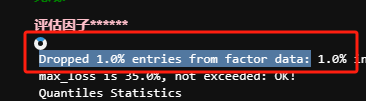

In [1]:
from cylib.factor_backtest.factor_exp_engine import *
import tqdm

#### 所需提交一：提交因子表达式所需的算子

In [2]:
import pandas as pd
import numpy as np

def ABS(price_df):
    return abs(price_df)

# CORR(A, B, n) - 序列A、B过去n天的相关系数
def CORR(A: pd.DataFrame, B: pd.DataFrame, n: int) -> pd.DataFrame:
    corr_df = A.rolling(window=n).corr(other=B)
    return corr_df

# DELAY(A, n) - A_i-n
def DELAY(A: pd.DataFrame, n: int) -> pd.DataFrame:
    delay_df = A.shift(n)
    return delay_df

# MEAN(A, n) - 序列A过去n天的均值
def MEAN(A: pd.DataFrame, n: int) -> pd.DataFrame:
    mean_df = A.rolling(window=n).mean()
    return mean_df

#### 所需提交二：提交存储因子表达式的字典

In [16]:
# 提交因子表达式字典
# 因子名字：(因子表达式，所需数据条目)
factor_def_dict = { 'alpha191_022':('MEAN(((CLOSE_DF-MEAN(CLOSE_DF,6))/MEAN(CLOSE_DF,6)-DELAY((CLOSE_DF-MEAN(CLOSE_DF,6))/MEAN(CLOSE_DF,6),3)),12)',22),
                  'alpha191_023':('MEAN(((CLOSE_DF-MEAN(CLOSE_DF,6))/MEAN(CLOSE_DF,6)-DELAY((CLOSE_DF-MEAN(CLOSE_DF,6))/MEAN(CLOSE_DF,6),3)),12)',22),
                  'alpha191_024':('MEAN(((CLOSE_DF-MEAN(CLOSE_DF,6))/MEAN(CLOSE_DF,6)-DELAY((CLOSE_DF-MEAN(CLOSE_DF,6))/MEAN(CLOSE_DF,6),3)),12)',22)}

##### 运行以下单元格衡量因子整体的覆盖率和IC表现,不要自行修改以下代码

In [43]:
basic_factors = get_needing_basic_factors(str(factor_def_dict))
basic_factors = [x[:-3].lower() for x in basic_factors]

In [44]:
%%time
ori_factor = get_list_factors(basic_factors,start_date='20220101',end_date = '20231230')
ori_factor.columns = [x.upper() for x in ori_factor.columns]
ori_factor = ori_factor.sort_index(ascending=True)
ori_factor['buy_price'] = ori_factor['CLOSE']

CPU times: user 2.34 s, sys: 413 ms, total: 2.75 s
Wall time: 2.9 s


In [ ]:
from IPython.display import clear_output

factor_eval_dict = {}
for factor_name in tqdm.tqdm(factor_def_dict):
    factor_exp = factor_def_dict[factor_name][0]
    factor_need_days = factor_def_dict[factor_name][1]
    f,d = exec_and_eval_exp(factor_exp=factor_exp,need_days=factor_need_days,
    quantiles=None,bins=10,original_data=ori_factor,max_loss=0.5)
    factor_eval_dict[factor_name] = d
    clear_output(wait=True)

In [ ]:
factor_score_list = []
for factor_name in tqdm.tqdm(factor_def_dict):
    tot_loss = factor_eval_dict['alpha191_022']['tot_loss']
    loss_score = 1 if tot_loss<0.1 else 0   #因子覆盖率需要大于90%
    ic_score = abs(factor_eval_dict['alpha191_022']['ic_summary_table'].loc['IC Mean',:]).mean()  #因子IC
    factor_score = loss_score*ic_score
    factor_score_list.append(factor_score)

In [60]:
if sum(factor_score_list)/(len(factor_def_dict) if len(factor_def_dict)>30 else 30) > 0.015:
    print('你提交的因子表达式字典符合测验要求！')
    print('你提交的因子数量：',len(factor_score_list))
    print('因子的IC均值：',sum(factor_score_list)/len(factor_score_list))
else:
    print('你提交的因子表达式字典不符合测验要求！')
    print('你提交的因子数量：',len(factor_score_list))
    print('因子的IC均值：',sum(factor_score_list)/len(factor_score_list))

你提交的因子表达式字典不符合测验要求！
你提交的因子数量： 3
因子的IC均值： 0.017
